In [1]:
import os
import io
import PySimpleGUI as sg
from PIL import Image
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

font = ("Roboto", 20)
sg.theme('Dark Blue')

df = pd.read_csv("DT_UKM.csv")

class_name = [
    '0. Permainan bola kecil (badminton, tenis meja, kasti, dll)',
    '1. Permainan bola besar (sepak bola, basket, voli, dll)',
    '2. Permainan taktik (catur, programming, dll)',
    '3. Rekreasi (memasak, renang, bela diri, dance, pengabdian sosial)',
    '4. Seni (seni rupa, cinematografi, paduan suara, band, dll)'
]
feature_name = [
    'jenis', 
    'tim', 
    'lingk', 
    'alat', 
    'strategi'
]
ukm = {
    'Permainan bola kecil (badminton, tenis meja, kasti, dll)': 0,
    'Permainan bola besar (sepak bola, basket, voli, dll)': 1,
    'Permainan taktik (catur, programming, dll)': 2,
    'Rekreasi (memasak, renang, bela diri, dance, pengabdian sosial)': 3,
    'Seni (seni rupa, cinematografi, paduan suara, band, dll)': 4
}
kelamin = {
    'Laki-laki': 0,
    'Perempuan': 1
}
kampus = {
    'Negeri': 0,
    'Swasta': 1
}
olahraga = {
    'Olahraga': 0,
    'Non Olahraga': 1
}
tim = {
    'Ya': 0,
    'Tidak': 1
}
lingkungan = {
    'Lingkungan formal': 0,
    'Lingkungan informal': 1
}
alat = {
    'Ya': 0,
    'Tidak': 1
}
strategi = {
    'Ya': 0,
    'Tidak': 1
}

df['jenis'] = df['jenis'].map(olahraga)
df['tim'] = df['tim'].map(tim)
df['lingk'] = df['lingk'].map(lingkungan)
df['alat'] = df['alat'].map(alat)
df['strategi'] = df['strategi'].map(strategi)
df['ukm'] = df['ukm'].map(ukm)
features = df[feature_name]
output = df['ukm']

dtree = DecisionTreeClassifier(
        criterion="entropy")
dtree = dtree.fit(features.values, output)

allign_center = [  
    [
        sg.Text("Jenis Kelamin : "),
        sg.Radio('Laki-laki', "RADIO1", key='male', default=True),
        sg.Radio('Perempuan', "RADIO1", key='female')
    ],
    [
        sg.Text("Jenis Kampus : "),
        sg.Radio('Negeri', "RADIO2", key='local', default=True),
        sg.Radio('Swasta', "RADIO2", key='private')
    ],
    [
        sg.Text("Jenis UKM : "),
        sg.Radio('Olahraga', "RADIO3", key='sport', default=True),
        sg.Radio('Non Olahraga', "RADIO3", key='non_sport')
    ],
    [
        sg.Text("Tim : "),
        sg.Radio('Ya', "RADIO4", key='team1', default=True),
        sg.Radio('Tidak', "RADIO4", key='team2')
    ],
    [
        sg.Text("Jenis Lingkungan : "),
        sg.Radio('Formal', "RADIO5", key='formal', default=True),
        sg.Radio('Informal', "RADIO5", key='informal')
    ],
    [
        sg.Text("Memakai Alat? : "),
        sg.Radio('Ya', "RADIO6", key='tool1', default=True),
        sg.Radio('Tidak', "RADIO6", key='tool2')
    ],
    [
        sg.Text("Strategi? : "),
        sg.Radio('Ya', "RADIO7", key='strat1', default=True),
        sg.Radio('Tidak', "RADIO7", key='strat2')
    ],
    [
        sg.Button('Predict')
    ],
    [
        sg.Text("Rekomendasi UKM : ", key="-RECOMENDATION-", justification='center')
    ]
]

def predictUKM(q3, q4, q5, q6, q7, dtree):
    prediction = dtree.predict([[q3, q4, q5, q6, q7]])

    ukm_reverse = {
        0: 'Permainan bola kecil (badminton, tenis meja, kasti, dll)',
        1: 'Permainan bola besar (sepak bola, basket, voli, dll)',
        2: 'Permainan taktik (catur, programming, dll)',
        3: 'Rekreasi (memasak, renang, bela diri, dance, pengabdian sosial)',
        4: 'Seni (seni rupa, cinematografi, paduan suara, band, dll)'
    }

    prediction = ukm_reverse.get(prediction[0])
    # print(prediction)
    return prediction

window = sg.Window("UKM Decision Tree", allign_center)
while True:
    event, values = window.read()
    # q1 = False
    # q2 = False
    q3 = False
    q4 = False
    q5 = False
    q6 = False
    q7 = False
    if event in (sg.WIN_CLOSED, "Exit"):
        break
    elif event == "Predict":
        # if values['female'] == True:
        #     q1 = True
        # if values['private'] == True:
        #     q2 = True
        if values['non_sport'] == True:
            q3 = True
        if values['team2'] == True:
            q4 = True
        if values['informal'] == True:
            q5 = True
        if values['tool2'] == True:
            q6 = True
        if values['strat2'] == True:
            q7 = True

    print_UKM = "Rekomendasi UKM : " + predictUKM(q3, q4, q5, q6, q7, dtree)
    window["-RECOMENDATION-"].update(print_UKM)

window.close()

Permainan bola besar (sepak bola, basket, voli, dll)
Rekreasi (memasak, renang, bela diri, dance, pengabdian sosial)
Permainan bola besar (sepak bola, basket, voli, dll)
Permainan bola kecil (badminton, tenis meja, kasti, dll)
Permainan bola besar (sepak bola, basket, voli, dll)
Permainan taktik (catur, programming, dll)
Permainan taktik (catur, programming, dll)


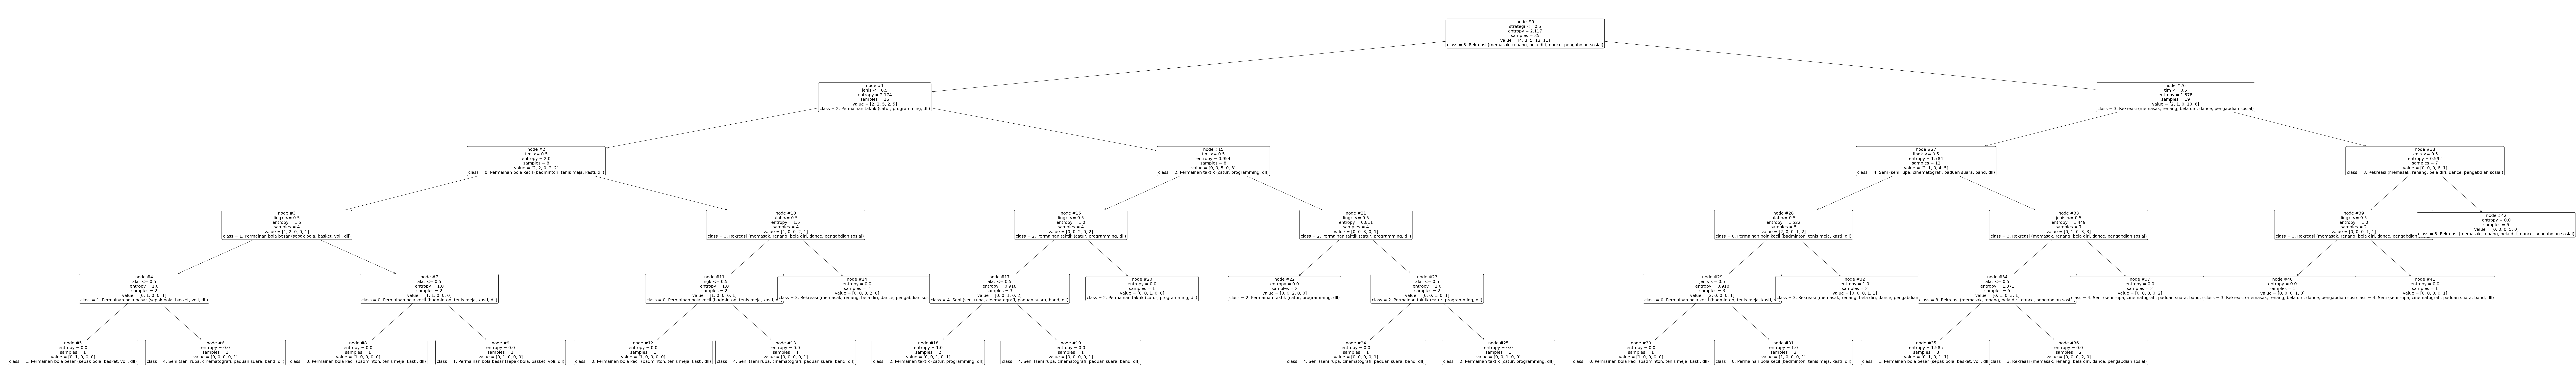

[0]
Permainan bola kecil (badminton, tenis meja, kasti, dll)


In [14]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

df = pd.read_csv("DT_UKM.csv")
# print(df)

class_name = [
    '0. Permainan bola kecil (badminton, tenis meja, kasti, dll)',
    '1. Permainan bola besar (sepak bola, basket, voli, dll)',
    '2. Permainan taktik (catur, programming, dll)',
    '3. Rekreasi (memasak, renang, bela diri, dance, pengabdian sosial)',
    '4. Seni (seni rupa, cinematografi, paduan suara, band, dll)'
]
feature_name = [
    'jenis', 
    'tim', 
    'lingk', 
    'alat', 
    'strategi'
]
ukm = {
    'Permainan bola kecil (badminton, tenis meja, kasti, dll)': 0,
    'Permainan bola besar (sepak bola, basket, voli, dll)': 1,
    'Permainan taktik (catur, programming, dll)': 2,
    'Rekreasi (memasak, renang, bela diri, dance, pengabdian sosial)': 3,
    'Seni (seni rupa, cinematografi, paduan suara, band, dll)': 4
}
kelamin = {
    'Laki-laki': 0,
    'Perempuan': 1
}
kampus = {
    'Negeri': 0,
    'Swasta': 1
}
olahraga = {
    'Olahraga': 0,
    'Non Olahraga': 1
}
tim = {
    'Ya': 0,
    'Tidak': 1
}
lingkungan = {
    'Lingkungan formal': 0,
    'Lingkungan informal': 1
}
alat = {
    'Ya': 0,
    'Tidak': 1
}
strategi = {
    'Ya': 0,
    'Tidak': 1
}

df['jenis'] = df['jenis'].map(olahraga)
df['tim'] = df['tim'].map(tim)
df['lingk'] = df['lingk'].map(lingkungan)
df['alat'] = df['alat'].map(alat)
df['strategi'] = df['strategi'].map(strategi)
df['ukm'] = df['ukm'].map(ukm)
features = df[feature_name]
output = df['ukm']

transalted_csv = df[['Jenis kelamin', 'kampus', 'jenis', 'tim', 'lingk', 'alat', 'strategi', 'ukm']]
# print(transalted_csv)

# print(X)
# print(y) 

dtree = DecisionTreeClassifier(
        criterion="entropy")
dtree = dtree.fit(features.values, output)
# print(features)
# print(output)

# tree.plot_tree(dtree) 
# print(tree.plot_tree(dtree))

plt.figure(figsize=(200,30))
tree.plot_tree(dtree, fontsize=18, feature_names=feature_name, class_names=class_name, rounded=True, node_ids=True)
plt.show()

prediction = dtree.predict([[0, 0, 1, 0, 0]])
ukm_reverse = {
    0: 'Permainan bola kecil (badminton, tenis meja, kasti, dll)',
    1: 'Permainan bola besar (sepak bola, basket, voli, dll)',
    2: 'Permainan taktik (catur, programming, dll)',
    3: 'Rekreasi (memasak, renang, bela diri, dance, pengabdian sosial)',
    4: 'Seni (seni rupa, cinematografi, paduan suara, band, dll)'
}

print(prediction)
prediction = ukm_reverse.get(prediction[0])
print(prediction)

In [144]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

df = pd.read_csv("DT_UKM.csv")
# print(df)
# print("Dataset Length: ", len(df))
# print("Dataset Shape: ", df.shape)
# print("Dataset: ", df.head())

class_name = [
    '0. Permainan bola kecil (badminton, tenis meja, kasti, dll)',
    '1. Permainan bola besar (sepak bola, basket, voli, dll)',
    '2. Permainan taktik (catur, programming, dll)',
    '3. Rekreasi (memasak, renang, bela diri, dance, pengabdian sosial)',
    '4. Seni (seni rupa, cinematografi, paduan suara, band, dll)'
]
feature_name = [
    'jenis', 
    'tim', 
    'lingk', 
    'alat', 
    'strategi'
]
ukm = {
    'Permainan bola kecil (badminton, tenis meja, kasti, dll)': 0,
    'Permainan bola besar (sepak bola, basket, voli, dll)': 1,
    'Permainan taktik (catur, programming, dll)': 2,
    'Rekreasi (memasak, renang, bela diri, dance, pengabdian sosial)': 3,
    'Seni (seni rupa, cinematografi, paduan suara, band, dll)': 4
}
kelamin = {
    'Laki-laki': 0,
    'Perempuan': 1
}
kampus = {
    'Negeri': 0,
    'Swasta': 1
}
olahraga = {
    'Olahraga': 0,
    'Non Olahraga': 1
}
tim = {
    'Ya': 0,
    'Tidak': 1
}
lingkungan = {
    'Lingkungan formal': 0,
    'Lingkungan informal': 1
}
alat = {
    'Ya': 0,
    'Tidak': 1
}
strategi = {
    'Ya': 0,
    'Tidak': 1
}

df['jenis'] = df['jenis'].map(olahraga)
df['tim'] = df['tim'].map(tim)
df['lingk'] = df['lingk'].map(lingkungan)
df['alat'] = df['alat'].map(alat)
df['strategi'] = df['strategi'].map(strategi)
df['ukm'] = df['ukm'].map(ukm)
features = df[feature_name]
output = df['ukm']

transalted_csv = df[['Jenis kelamin', 'kampus', 'jenis', 'tim', 'lingk', 'alat', 'strategi', 'ukm']]
# print(transalted_csv)

# Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(features, output, test_size=0.2)

dtree = DecisionTreeClassifier(criterion="entropy")
# dtree = dtree.fit(features.values, output)
# print(features.values)
# print(output)
# print(X_train)
# print(X_test)
# print(y_train)
# print(y_test)
dtree = dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)
print("Predicted values: ", y_pred)
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print("Accuracy : ", accuracy_score(y_test, y_pred) * 100)
print("Report : ", classification_report(y_test, y_pred))
# tree.plot_tree(dtree) 
# print(tree.plot_tree(dtree))

# plt.figure(figsize=(200,30))
# tree.plot_tree(dtree, fontsize=18, feature_names=feature_name, class_names=class_name, rounded=True, node_ids=True)
# plt.show()

prediction = dtree.predict([[0, 0, 1, 0, 0]])
ukm_reverse = {
    0: 'Permainan bola kecil (badminton, tenis meja, kasti, dll)',
    1: 'Permainan bola besar (sepak bola, basket, voli, dll)',
    2: 'Permainan taktik (catur, programming, dll)',
    3: 'Rekreasi (memasak, renang, bela diri, dance, pengabdian sosial)',
    4: 'Seni (seni rupa, cinematografi, paduan suara, band, dll)'
}

print(prediction)
prediction = ukm_reverse.get(prediction[0])
print(prediction)

Predicted values:  [2 4 1 3 4 3 3]
Confusion Matrix:  [[0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 1 0 0]
 [0 1 0 2 0]
 [0 0 0 1 0]]
Accuracy :  42.857142857142854
Report :                precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       1.00      1.00      1.00         1
           3       0.67      0.67      0.67         3
           4       0.00      0.00      0.00         1

    accuracy                           0.43         7
   macro avg       0.33      0.33      0.33         7
weighted avg       0.43      0.43      0.43         7

[0]
Permainan bola kecil (badminton, tenis meja, kasti, dll)


c:\Users\marvi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\marvi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\marvi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,